In [1]:
from preamble import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
# 기본 라이브러리들을 import함

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 한글 출력시 오류가 나서 이 부분을 추가

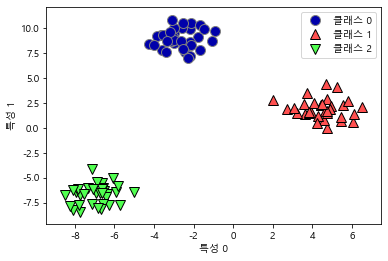

In [3]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

# Multi-class와 Binary의 차이를 확인하기 위해서 클래스가 3개인를 확인하기 위해서 
# 클래스가 3개인 그래프를 생성

In [4]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression().fit(X, y)
print("계수 배열의 크기: ", logr.coef_.shape)
print("절편 배열의 크기: ", logr.intercept_.shape)

# Multi 클래스의 계수 배열과 절편 배열의 크기를 출력

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


In [5]:
from sklearn.linear_model import LogisticRegression

logr_ovr = LogisticRegression(multi_class='ovr').fit(X, y)
print("계수 배열의 크기: ", logr_ovr.coef_.shape)
print("절편 배열의 크기: ", logr_ovr.intercept_.shape)

# ovr 클래스의 계수 배열과 절편 배열의 크기를 출력

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수배열:
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


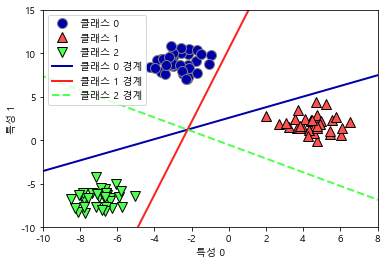

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'])
print("계수배열:\n", logr.coef_)

# multinomial의 경우 경계가 확실하게 나눠짐
# 즉, 세 선이 한 점에서 만남
# 그래서 가운데에 빈 공간이 생기지 않음
# 색으로 표현도 가능
# 계수배열을 출력

계수배열:
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


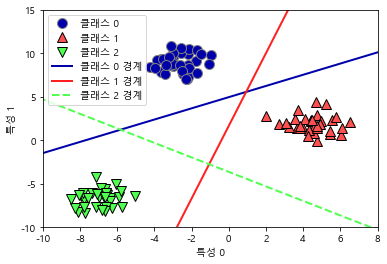

In [7]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_ovr.coef_, logr_ovr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2", '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'])
print("계수배열:\n", logr.coef_)

# ovr 클래스로 경계를 출력
# 세 선이 한점에서 만나지 않음
# 그래서 가운데 빈 공간이 생성됨

Text(0, 0.5, '특성 1')

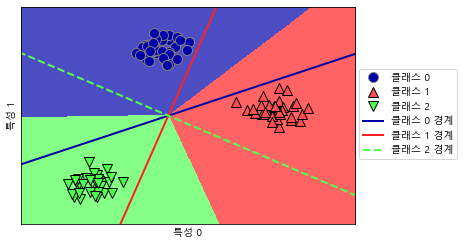

In [8]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr.coef_, logr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# 색을 통해서 보면 결정 경계를 정확하게 알 수 있음

Text(0, 0.5, '특성 1')

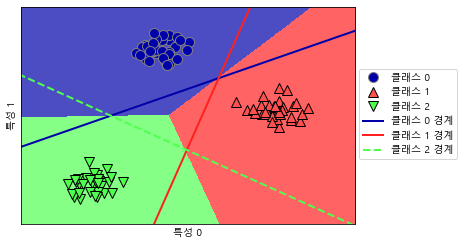

In [9]:
mglearn.plots.plot_2d_classification(logr, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_ovr.coef_, logr_ovr.intercept_,
                                 mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# ovr 클래스도 색을 통해 결정 경계를 알 수 있음

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr = LogisticRegression().fit(X, y)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(logr.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

# 새로운 창에서 실행했으므로 sklearn 관련 모듈들을 다시 import
# iris를 로지스틱 회귀를 이용
# 테스트 정확도를 출력

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도: 0.92
Number of mislabeled points out of a total %d points : %d (60, 5)


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr_ovr = LogisticRegression(multi_class='ovr').fit(X, y)
logr_ovr.fit(X_train, y_train)
y_pred = logr_ovr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도: {:.2f}".format(logr_ovr.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

# ovr 클래스로 테스트 정확도를 측정했지만 수업 내용과 다르게 출력됨
# 정확도가 같지는 않지만 비슷하고, 세부 정확도도 다름

[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]

테스트 세트의 정확도: 0.90
Number of mislabeled points out of a total %d points : %d (60, 6)


In [12]:
print("predict:\n", logr.predict(X_test[:30]))
print("probability:\n", logr.predict_proba(X_test[:30]))

# 멀티 클래스와 ovr 클래스를 비교하기 위해서 predict와 probability를 출력

predict:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability:
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


In [13]:
print("predict:\n", logr_ovr.predict(X_test[:30]))
print("probability:\n", logr_ovr.predict_proba(X_test[:30]))

# predict의 앞부분만 보면 같게 나오지만 뒤에 다른 부분이 있음
# probability도 다름

predict:
 [2 1 0 2 0 2 0 2 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
probability:
 [[0.001 0.313 0.687]
 [0.029 0.937 0.034]
 [0.981 0.019 0.   ]
 [0.    0.333 0.667]
 [0.89  0.11  0.   ]
 [0.    0.187 0.813]
 [0.924 0.076 0.   ]
 [0.009 0.469 0.522]
 [0.005 0.587 0.409]
 [0.056 0.838 0.106]
 [0.    0.497 0.503]
 [0.021 0.511 0.468]
 [0.009 0.731 0.259]
 [0.008 0.625 0.367]
 [0.009 0.629 0.362]
 [0.919 0.081 0.   ]
 [0.014 0.654 0.331]
 [0.018 0.851 0.131]
 [0.81  0.19  0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.425 0.573]
 [0.018 0.646 0.335]
 [0.852 0.148 0.   ]
 [0.752 0.248 0.   ]
 [0.003 0.468 0.529]
 [0.933 0.067 0.   ]
 [0.941 0.059 0.   ]
 [0.029 0.772 0.198]
 [0.17  0.823 0.006]
 [0.897 0.103 0.   ]]


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)

print("\n테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy:  1.0

테스트 세트의 정확도: 1.00
Number of mislabeled points out of a total %d points : %d (38, 0)


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.4)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)

print("\n테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy:  0.9333333333333333

테스트 세트의 정확도: 0.93
Number of mislabeled points out of a total %d points : %d (60, 4)


In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.3)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)

print("\n테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

Accuracy:  1.0

테스트 세트의 정확도: 1.00
Number of mislabeled points out of a total %d points : %d (45, 0)


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.33)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

nErrors = (y_test != y_pred).sum()
accuracy = 1.0 - nErrors / y_test.shape[0]
print("Accuracy: ", accuracy)

print("\n테스트 세트의 정확도: {:.2f}".format(classifier.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d", (X_test.shape[0], (y_test != y_pred).sum()))

# test size에 따라 정확도가 달라짐
# 가우시안 나이브 베이즈 사용법 숙지, nErrors를 이용하여 정확도를 측정하는 방법도
# 있으므로 이것도 숙지

Accuracy:  0.96

테스트 세트의 정확도: 0.96
Number of mislabeled points out of a total %d points : %d (50, 2)


In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
classifierGN = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

# cancer 데이터에 가우시안 나이브 베이즈 방법을 적용

훈련 세트 점수: 0.946
테스트 세트 점수: 0.937


In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
classifierGN = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(classifierGN.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(classifierGN.score(X_test, y_test)))

# cancer 데이터에 LogisticRegression을 적용해서 실행
# 위와 비교해보면 테스트 세트 점수가 높으므로 cancer에 대해선
# LogisticRegression 방법이 더 좋다.
# max_iter를 증가시켜야 빨간 경고가 나오지 않을 것 같은데, 
# max_iter를 증가시키는 방법을 몰라 해결하지 못하고 있다.
# 아마 이것 때문에 훈련 세트 점수가 강의와 다르게 나온 것 같다.

훈련 세트 점수: 0.944
테스트 세트 점수: 0.958


C:\Users\white\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

# DecisionTreeClassifier 모듈이 없어서 에러가 발생, 그래서 추가로 import함
# 샘플의 수가 100개인 데이터를 만들어서 DecisionTreeClassifier를 통해 훈련 및 테스트
# 이것은 결정트리를 이용하는 것으로 모든 노드가 순수 노드가 될 때 까지 실행
# 그래서 과적합이 발생함
# 이것은 훈련 세트 점수를 보면 확인할 수 있음

훈련 세트 점수: 1.000
테스트 세트 점수: 0.840


In [21]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

# 이번에는 위에서 한 것과 비슷하지만 max_depth를 줘서 과적합을 막음
# 즉, 깊이에 제한을 두는 것인데, 이 경우 4번까지밖에 분리가 안되므로
# 순수 노드가 위보다 적음
# 위에보다 훈련 세트 점수가 낮아진 것을 확인할 수 있음

훈련 세트 점수: 0.933
테스트 세트 점수: 0.800


In [22]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shpae: {}".format(X_train.shape), "X_test.shpae: {}".format(X_test.shape))

for max_depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state=0) 
    tree.fit(X_train, y_train)
    print("max_depth= {}".format(max_depth))
    print("훈련 세트 점수: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 점수: {:.3f}".format(tree.score(X_test, y_test)))

# cancer 데이터에도 결정트리를 이용
# max_depth의 값을 변경하여 출력
# 과적합일 때 테스트 세트 점수가 낮아지는 것을 볼 수 있음(max_depth=8일때)

X_train.shpae: (426, 30) X_test.shpae: (143, 30)
max_depth= 1
훈련 세트 점수: 0.923
테스트 세트 점수: 0.923
max_depth= 4
훈련 세트 점수: 0.988
테스트 세트 점수: 0.951
max_depth= 8
훈련 세트 점수: 1.000
테스트 세트 점수: 0.937


In [23]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

# 결정트리를 출력하기 위한 코드
# 결과 파일을 tree.dot로 해서 저장

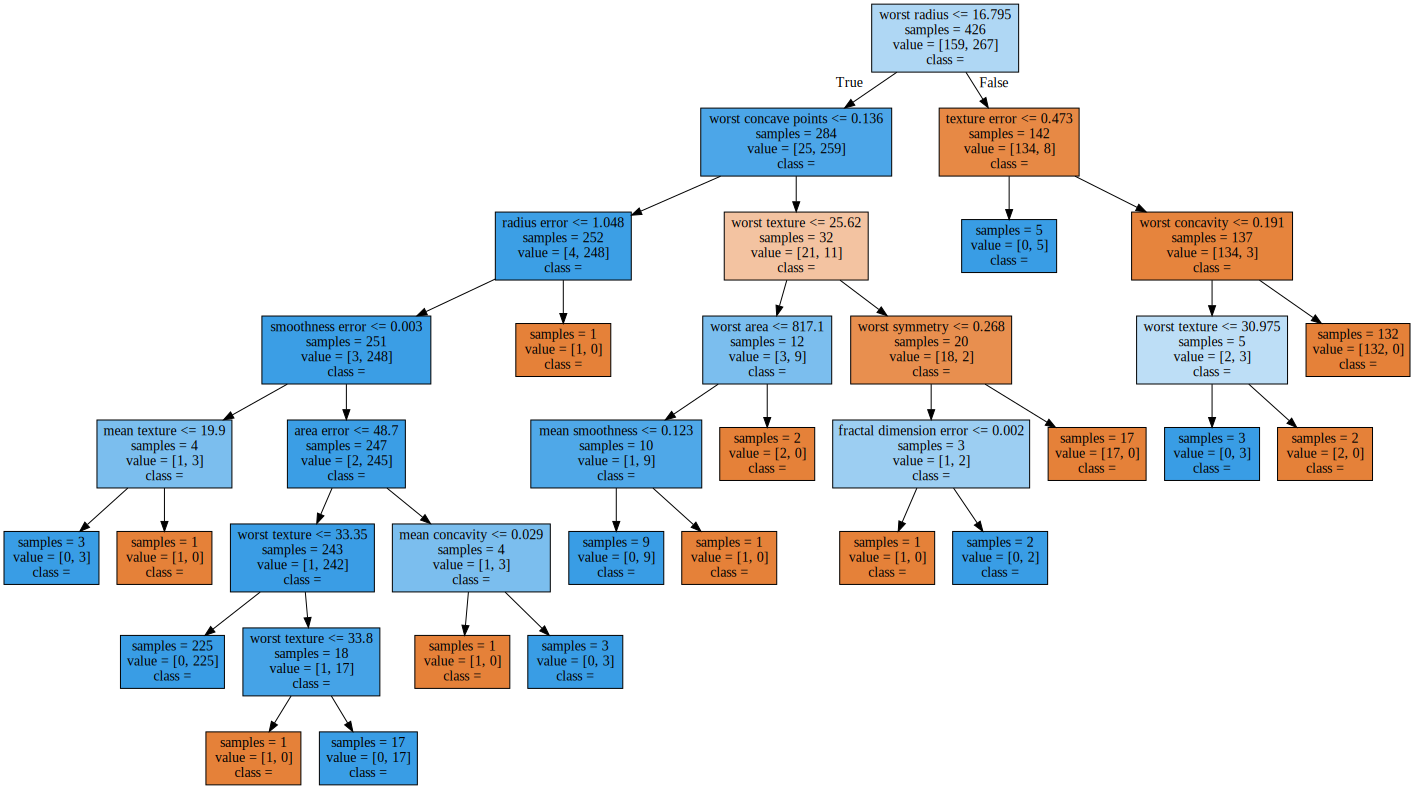

In [24]:
import graphviz
with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 결정트리를 출력하기 위한 코드
# tree.dot를 출력

In [25]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

# 트리의 특성 중요도를 출력
# 이것은 각 특성이 얼마나 중요한지를 보여줌
# 원소의 범위는 0~1 사이, 전체 원소의 합은 1
# 0은 사용되지 않고 1은 타깃 클래스를 완벽하게 예측
# 이 중요도가 낮다고 유용하지 않은 것은 아님
# 다른 특성이 동일한 정보를 지닐 수 있다.
# 어떤 클래스를 지지하는지는 모름

특성 중요도:
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


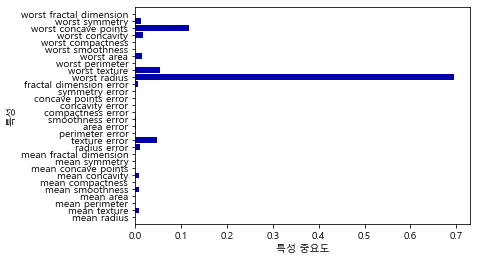

In [26]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

# 트리의 특성 중요도를 막대 그래프로 표시
# cancer 데이터의 특성이 30개가 있음
# 결정 트리는 특성 중요도를 가지고 있음
# 즉, 여기서는 30개의 특성의 중요도를 모두 막대그래프로 표시

Feature importances: [0. 1.]


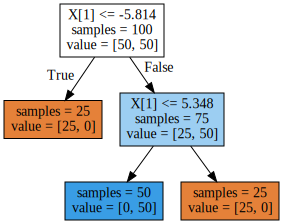

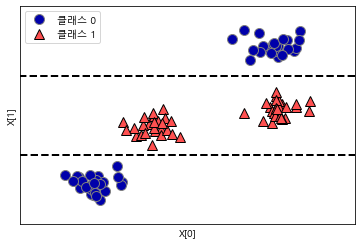

In [27]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 정확하게 분류 가능하지만 선을 2개 사용해야 함
# 그래서 2번만에 분류 가능

ram_price.shape: (333, 3)
ram_price.keys: <bound method NDFrame.keys of      Unnamed: 0     date     price
0             0  1957.00  4.11e+08
1             1  1959.00  6.79e+07
2             2  1960.00  5.24e+06
3             3  1965.00  2.64e+06
4             4  1970.00  7.34e+05
..          ...      ...       ...
328         328  2015.58  4.50e-03
329         329  2015.67  4.30e-03
330         330  2015.75  4.20e-03
331         331  2015.83  3.80e-03
332         332  2015.92  3.70e-03

[333 rows x 3 columns]>
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06
3           3  1965.0  2.64e+06
4           4  1970.0  7.34e+05


Text(0, 0.5, '가격 ($/Mbyte)')

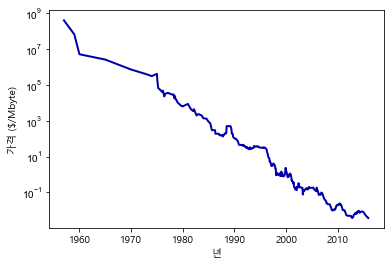

In [28]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_price.shape: {}".format(ram_prices.shape))
print("ram_price.keys: {}".format(ram_prices.keys))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

# 결정트리를 회귀에도 사용
# 2000년까지 램 가격을 훈련 데이터로, 2000년 이후의 램 가격을 테스트 데이터로 사용

In [38]:
from sklearn.tree import DecisionTreeRegressor

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("data_train.shape: {}".format(data_train.shape), "data_test.shape: {}".format(data_test.shape))

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

# 2000년 이전을 훈련 데이터, 2000년 이후를 테스트 데이터로 만듦
# 가격 예측을 위해 날짜 특성만을 이용 - X_train 정의 부분
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿈 - y_train 정의 부분
# 예측은 전체 기간에 대해 실행 - X_all 정의 부분
# 예측한 값의 로그 스케일을 되돌림- price_tree, price_lr 정의 부분
# 여기서도 경고 메세지가 출력이 되었는데, 왜 나오는지 해결을 못했다.

data_train.shape: (202, 3) data_test.shape: (131, 3)


<ipython-input-38-b6655c56a8ba>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-38-b6655c56a8ba>:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


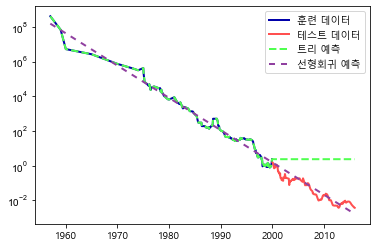

In [40]:
plt.yticks(fontname="Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

# 트리 예측은 2000년 이후로 일직선으로 나옴
# 즉, 결정트리는 훈련 데이터 범위를 벗어나면 예측이 잘 안됨
# 등락 예측에는 사용 가능

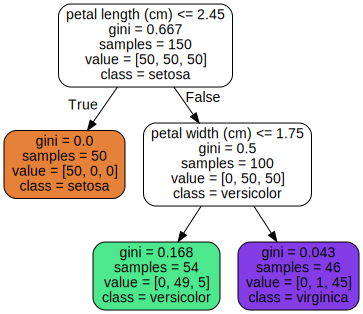

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file("iris_tree.dot")

# Source모듈이 없어서 에러가 발생, 그래서 Source를 추가로 import함
# iris에서 꽃잎 길이와 너비로 결정트리 생성
# max_depth를 2로 설정
# 지니 지수로 생성

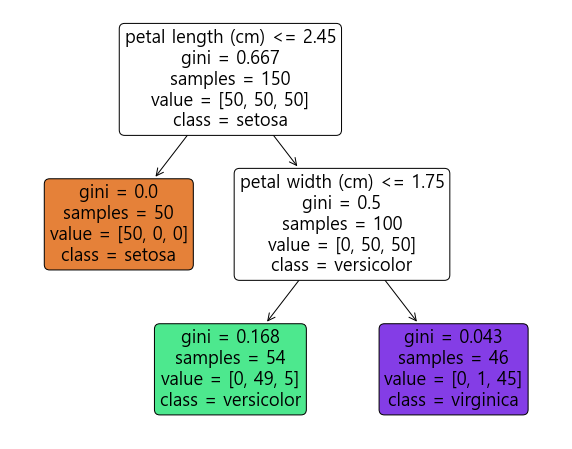

In [43]:
from sklearn.tree import plot_tree
# plot_tree
#filled=True : 클래스별로 색깔구분
#rounded = true
#max_depth = 2, 출력의 단계를 결정할 수 있다.
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded = True, max_depth=2,
    feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

# plot 트리로도 그릴 수 있음
# 위의 결정 트리에서는 max_depth로 결정 트리를 만들어서 출력을 하는데
# plot 트리는 끝까지 트리를 그리고나서 설정해준 max_depth만큼만 보여줌
# 그래서 plot 트리가 융통성이 더 있음
# 엔트로피 지수로 생성

# 엔트로피와 지니를 계산하는 방식은 다르지만 결과는 거의 비슷함

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

# 샘플의 수가 100개인 데이터로 훈련, 테스트 데이터로 나눔
# 랜덤포레스트로 트리를 5개를 만들고 훈련 데이터로 훈련

RandomForestClassifier(n_estimators=5, random_state=2)

In [51]:
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

# cross_val_score 모듈이 없어 에러가 발생, 그래서 cross_val_score 모듈 import함
# 처음에는 정확도가 높음
# 데이터를 조각으로 나눠서 하나를 테스트로하고, 나머지를 훈련으로 하는 교차검증을 실행
# 10조각으로 했을 경우 일반화가 되서 0.84가 됨

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.840



In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test, y_test)))

cvscores = cross_val_score(dt, X, y, cv=5)
print("테스트 세트 정확도 CV=5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(dt, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))

# 위와 비교해보면 처음에는 정확도가 낮음
# 그런데 교차검증을 했을 때 조각이 5조각의 경우 정확도가 같고, 10조각의 경우 더 
# 높은 정확도를 보이고 있음
# 따라서 한 번만 돌리고 정확도가 높은 것이 좋다고 할 수 없음

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV=5: 0.860

테스트 세트 정확도 CV=10: 0.850



In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}\n".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV=10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

# cancer 데이터에 랜덤 포레스트와 교차검증 적용
# 훈련 데이터에서는 모두 맞춤 - 이것을 주의해야 함(과적합)
# 일반화를 위해서 10조각으로 함
# 10번의 교차검증 결과를 출력

# 랜덤포레스트는 선형모델이나 단일 결정트리보다 높은 성능
# 단일 결정트리처럼 max-features 매개변수 조정 가능, 사전 가지치기 가능
# 기본 설정으로도 좋은 성능을 가짐

# 실전에 사용할만한지는 다른 것도 고려해야 함
# 어떤 에러를 더 중요하게 생각하는가에 따라 결정경계를 조정함

훈련 세트 정확도: 1.000

테스트 세트 정확도: 0.972

테스트 세트 정확도 CV=10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


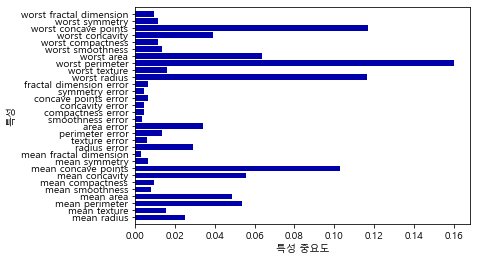

In [55]:
plot_feature_importances_cancer(forest)

# 앞에서 정의한 특성 중요도에 따른 막대그래프를 출력

# 결정트리와 같이 Worst-radius를 중요하게 봄
# 하지만 랜덤포레스트에서는 Worst perimeter(경계)를 가장 중요하게 봄
# 각 트리에서 특성의 중요도를 취합
# 그래서 하나의 트리에서의 특성 중요도보다 신뢰가 가능함
# 단일 결정 트리와 비교하여 많은 특성이 0이상의 중요도를 가짐